In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

**Detección de Objetos - Contornos**

**Etiquetado de Componentes Conexas (Connected Components Labelling)**

Dos píxeles están **conectados** si cada uno de ellos pertenece a la "vecindad" del otro. O sea que es posible encontrar un camino entre ellos.

**Conectividad Tipo 4

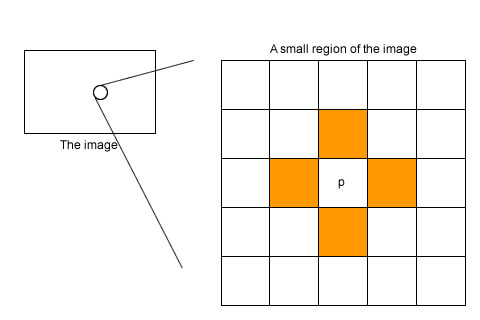



**Conectividad Tipo 8**

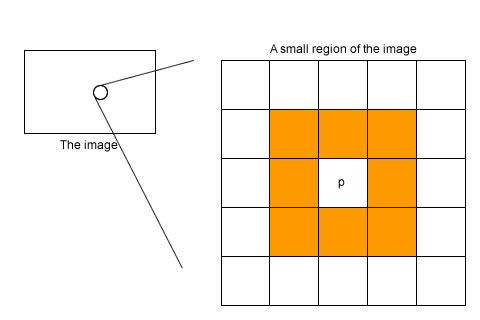


**Algoritmo**

La imagen debe ser binaria

Se recorre de izquierda a derecha, de arriba hacia abajo.

Dado un píxel 1, se investiga lo que sucede **arriba y a la izquierda** (lugares ya recorridos). 
	
    Si ninguno es 1 se le coloca una nueva etiqueta. 
	
    Si uno solo es 1, le damos la etiqueta de ese.
    
    Si ambos son 1, se le da al píxel la etiqueta que tienen, si son distintas se elige uno (criterio variable, o la de la izquierda o la menor o más antigua). Se registra que las etiquetas son equivalentes.
	


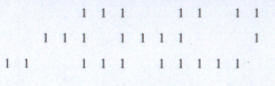

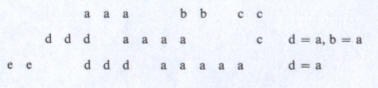


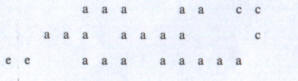


Para el caso de 8-vecinos se considera también la diagonal.

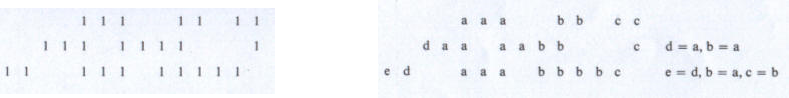

**Bordes y Contornos**
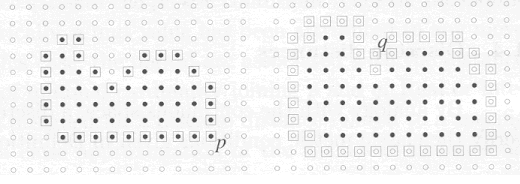



Sea una imagen binaria. (p: negro, q: blanco)
El borde de la zona negra está dado por el conjunto de píxeles negros que tengan al menos un q-vecino blanco (q=4 o q=8):
Análogamente se define el borde de una zona blanca.

Un punto es final si tiene exactamente un vecino negro.


**Diferencia entre bordes y contornos**

Los contornos son cerrados.


**Códigos Cadena (Chain Codes)**

**Métod de Representación**

Es un método de compresión sin pérdidas para almacenar los píxeles de un contorno.

Los códigos de cadena se utilizan para representar **un contorno** por medio de una sucesión conexa
de segmentos de longitud y dirección especificadas. Normalmente esta representación se basa en
segmentos de conectividad 4 u 8.

Puede usarse 4-conectividad u 8-conectividad

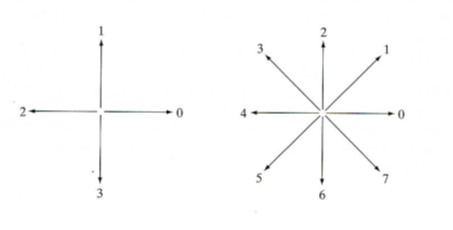

**Ejemplo de González Woods**

Podemos usar los 4-vecinos o los 8-vecinos

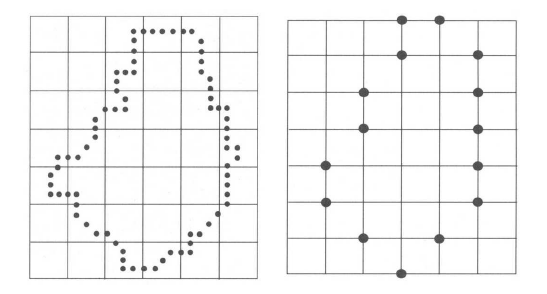

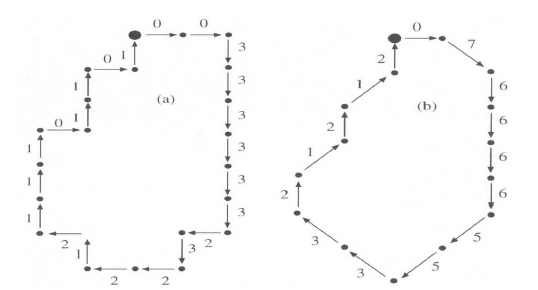


**La precisión depende de la grilla**

**Problema: cualquier error se propaga**

Se puede normalizar el código


*Otro ejemplo*

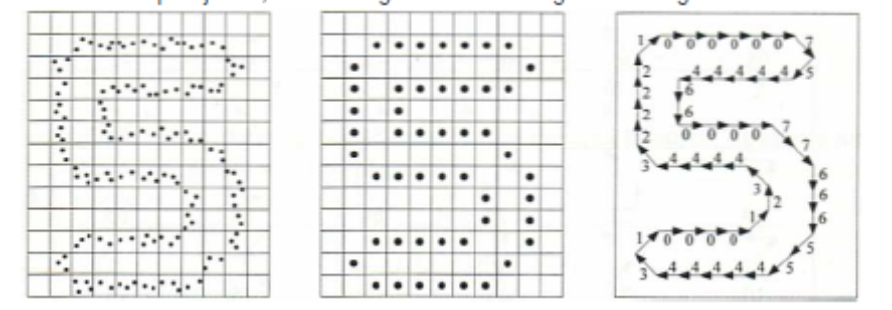

**Detección de Objetos**


Convertir la imagen a escala de grises

Filtrar la imagen para eliminar el ruido

Aplicar el detector de bordes Canny

Buscar los contornos considerando los bordes detectados

Dibujar dichos contornos

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

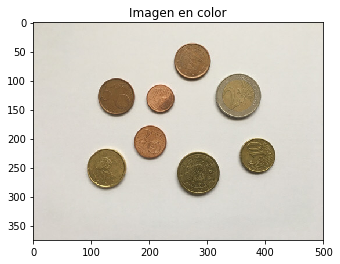

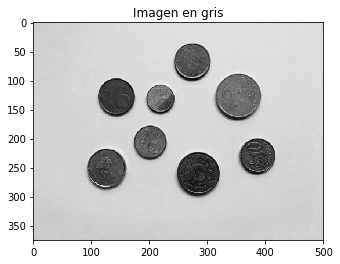

In [4]:
# Cargamos la imagen
imgcolor = cv2.imread("../img/monedas.jpg")
imgcolorRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)

# Cambiamos de BGR a RGB para poder usar matplotlib
imggris = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2GRAY)

plt.imshow(imgcolorRGB)
plt.title('Imagen en color')
plt.show()

plt.imshow(imggris,cmap='gray')
plt.title('Imagen en gris')
plt.show()

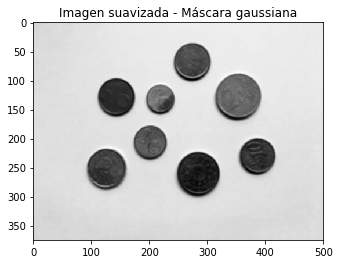

In [5]:
# dst = cv.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )
# sigma da el ancho de la campana de Gauss- Se recomienda dejar la elección al Python
imggaussiana = cv2.GaussianBlur(imggris, (5,5), 0)

plt.imshow(imggaussiana, cmap='gray')
plt.title('Imagen suavizada - Máscara gaussiana')
plt.show()

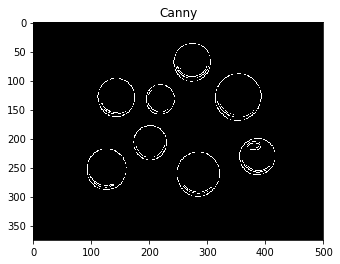

In [6]:
#Canny no es completamente automático. Pide umbral inferior y superior
# Probaremos con 50 y 150
imgcanny = cv2.Canny(imggaussiana, 50, 150)

plt.imshow(imgcanny, cmap='gray')
plt.title('Canny')
plt.show()

In [7]:
#La imagen obtenida mediante el algoritmo de Canny es BINARIA
print(imgcanny.max())
print(imgcanny.min())

255
0


Encontró 8 objectos


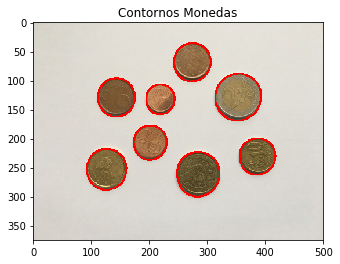

In [8]:
#Buscamos los contornos
#Buscaremos solo los píxeles externos
#cv2.findContours(arg1,arg2,arg3)
#arg1 es la imagen
#arg2 es el tipo de contorno. Pedimos solo el contorno externo #cv2.RETR_EXTERNAL
    #CV_RETR_EXTERNAL retrieves only the extreme outer contours. 
    
    #CV_RETR_LIST retrieves all of the contours without establishing any hierarchical relationships.
    #CV_RETR_CCOMP retrieves all of the contours and organizes them into a two-level hierarchy. 
        #At the top level, there are external boundaries of the components. 
        #At the second level, there are boundaries of the holes. 
        #If there is another contour inside a hole of a connected component, it is still put at the top level.
    #CV_RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours. 

#arg3 es el método usado para enlazar
#Utilizaremos un método simple, eliminando píxeles redundantes cv2.CHAIN_APPROX_SIMPLE
    #cv2.CHAIN_APPROX_SIMPLE
    #cv2.CHAIN_APPROX_NONE almacena todos los píxeles del contorno

contornos, _ = cv2.findContours(imgcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
#print(contornos)#Muestra la lista hecha con los píxeles que son contornos, 
#la lista tiene tantos elementos como objetos

# Mostramos el número de objetos por pantalla
#print(len(contornos)) 
print("Encontró {} objectos".format(len(contornos)))

#Para dibujar los contornos opencv tiene la función drawContours
#cv2.drawContours(arg1,arg2,arg3,arg4,arg5)
#Primer argumento la imagen, 
#segundo recibe la lista y marca los píxeles
#Tercer argumento: el índice de contorno a dibujar. Si son todos se pone -1
#Cuarto argumento: color. En este caso rojo (es opencv)
#Quinto argumento: grosor
cv2.drawContours(imgcolor, contornos, -1, (0, 0, 255), 2)

imgcolorRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
plt.imshow(imgcolorRGB)
plt.title('Contornos Monedas')
plt.show()

#cv2.imshow("contornos monedas", imgcolor)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

**Ejercicio**

Repetir el procedimiento para la imagen "monedas1.jpg"

(Uniendo todos los  bloques de código en un solo programa)

Repita el procedimiento para "euros.jpg". Comente los resultados.


**OpenCV usa el algoritmo de Satoshi Suzuki para encontrar bordes**

**OPENCV Contornos**
Funciones: cv2.findContours(), cv2.drawContours()

¿Qué es un contorno? Un contorno es una curva que une todos los puntos continuos en una imagen (a lo largo de los bordes), que tienen el mismo color o intensidad. Los contornos son una herramienta útil para el análisis de formas y para la detección y reconocimiento de objetos. Algunas consideraciones generales a tener en cuenta son:

Para una mayor precisión lo mejor es utilizar imágenes binarias. Así que antes de encontrar los contornos, es recomendable aplicar cierto umbral o utilizar el algoritmo de Canny para la detección de bordes.

La función findContours modifica la imagen de origen. Por lo tanto, si desea conservar la imagen original incluso después de encontrar contornos, esta se debe almacenar en una variable distinta.

En OpenCV, encontrar contornos es como encontrar objetos blancos de fondo negro. Así que recuerde, el objeto a ser encontrado debe ser blanco y el fondo debe ser negro.

La función cv2.findContours tiene tres argumentos. El primero es la imagen fuente, el segundo es el modo de recuperación de contorno, y el tercero es el método de aproximación de contorno.

Del mismo modo, la función posee tres variables de salida: imagen, contornos y jerarquía. Contornos es una **lista** de Python de todos los contornos de la imagen. Cada contorno individual es una **matriz** con las coordenadas (x, y) de los puntos de los bordes del objeto.

Método de aproximación de contornos

Dado por el tercer argumento en la función cv2.findContours.

Los contornos son los límites de una forma con la misma intensidad. La variable contornos almacena las coordenadas (x, y) de los bordes de una forma. ¿Almacena todas las coordenadas? Esto se precisamente lo que se especifica mediante este método de aproximación de contorno.

Si se pasa cv2.CHAIN_APPROX_NONE, todos los puntos de los bordes se almacenan. ¿Pero realmente necesitamos todos los puntos? Por ejemplo, supongamos que encontramos el contorno de una línea recta. Sólo necesitamos dos puntos. Esto es lo que hace cv2.CHAIN_APPROX_SIMPLE. Es decor, elimina todos los puntos redundantes y comprime el contorno, ahorrando memoria.

Para dibujar los contornos se utiliza la función cv2.drawContours.

Esta función también se puede utilizar para dibujar cualquier forma siempre que se conozcan sus contornos.

También tiene 3 argumentos: el primer argumento de la función es la imagen fuente, el segundo argumento son los contornos, que deben ser pasados como una lista de Python; el tercer argumento es el índice de los contornos (útil para dibujar contornos individuales; para dibujar todos los contornos fijar este parámetro en -1), y los restantes argumentos son color, grosor, etc.

Ejemplo

cnt = contornos[4] 
cv2.drawContours(imagen, [cnt], 0, (0,255,0), 3) #Dibuja el cuarto contorno

#También se podría haber ordenado como

cv2.drawContours(img, contornos, 3, (0,255,0), 3)



In [9]:
def get_contours(img_file, gaussian_const=5):
    imgcolor = cv2.imread(img_file)
    plt.imshow(imgcolor)
    plt.title('Imagen Original')
    plt.show()
    
    # Cambiamos de BGR a RGB para poder usar matplotlib
    imgcolorRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
    imggris = cv2.cvtColor(imgcolorRGB, cv2.COLOR_BGR2GRAY)
    
    imggaussiana = cv2.GaussianBlur(imggris, (gaussian_const, gaussian_const), 0)
    imgcanny = cv2.Canny(imggaussiana, 50, 150)

    contornos, _ = cv2.findContours(imgcanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  
    print("Se encontraron '{}' objectos".format(len(contornos)))

    cv2.drawContours(imgcolor, contornos, -1, (0, 0, 255), 2)

    imgcolorRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
    plt.imshow(imgcolorRGB)
    plt.title('Contornos')
    plt.show()

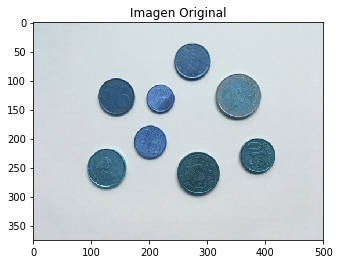

Se encontraron '8' objectos


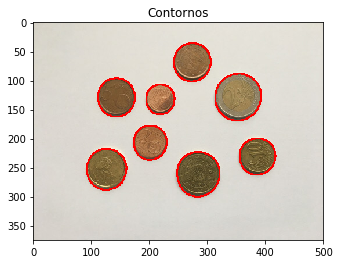

In [10]:
get_contours("../img/monedas.jpg", gaussian_const=5)

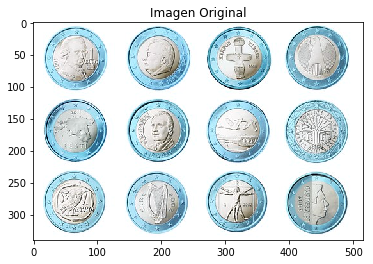

Se encontraron '12' objectos


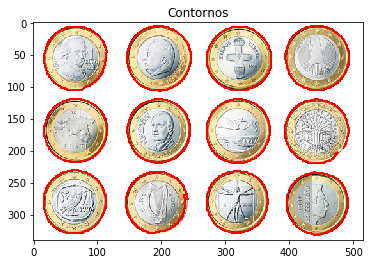

In [11]:
get_contours("../img/euros.jpg", gaussian_const=13)